In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

iris = load_iris()

x = iris.data 
y = iris.target

In [4]:
print("Original shape of Data:", x.shape)

Original shape of Data: (150, 4)


In [6]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [10]:
pca = PCA(n_components = 0.95)
pca.fit(x_scaled)

PCA(n_components=0.95)

In [11]:
x_reduced = pca.transform(x_scaled)
print("Reduced shape of data:", x_reduced.shape)

Reduced shape of data: (150, 2)


In [13]:
print("Number of components selected:", pca.n_components_)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Retained:", np.sum(pca.explained_variance_ratio_))

Number of components selected: 2
Explained Variance Ratio: [0.72962445 0.22850762]
Total Variance Retained: 0.9581320720000163


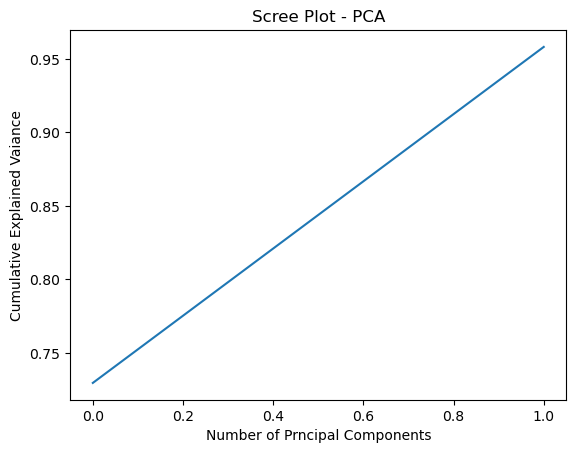

In [16]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Prncipal Components")
plt.ylabel("Cumulative Explained Vaiance")
plt.title("Scree Plot - PCA")
plt.show()

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_reduced, y, test_size = 0.2, random_state = 42)

In [19]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [21]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

In [22]:
print("Model Accuracy after PCA:", accuracy)

Model Accuracy after PCA: 0.9


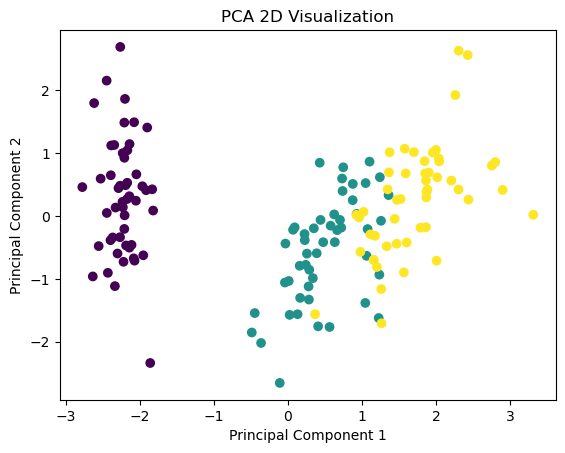

In [29]:
pca_2d = PCA(n_components = 2)
x_2d = pca_2d.fit_transform(x_scaled)

plt.figure()
plt.scatter(x_2d[:,0], x_2d[:,1], c=y)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA 2D Visualization")
plt.show()